#Test

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from tensorflow.keras.models import Sequential, Model
from keras.layers import Input, concatenate, Conv2D, MaxPooling2D, Conv2DTranspose, UpSampling2D
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
import tensorflow as tf
from sklearn.model_selection import train_test_split
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from tensorflow.keras.utils import img_to_array
from PIL import Image
from tensorflow.keras.losses import MeanAbsoluteError
import math
import numpy as np
from keras.optimizers import Adam

In [ ]:
!pip install orix

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.1/308.1 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.6/136.6 kB 13.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 205.9/205.9 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 27.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for diffpy.structure: filename=diffpy.structure-3.1.0-py3-none-any.whl size=172831 sha256=6b2b6079d28ca8b55e09bdc4f0aaf545a49bd281a4ff0a9e33aa8f6dab477756
  Stored in directory: /root/.cache/pip/wheels/5b/33/86/dde093d7a37d2d2c7342f3f575321fa2bac69ab376f89356d3
  Created wheel for pycifrw: filename=PyCifRW-4.4.5-cp310-cp310-linux_x86_64.whl size=163210 sha256=169c68e82be71943ea0c6157f3d101e8b86d18f9c6d6f3514923a59b117ac1ad
  Stored in directory: /root/.cache/pip/wheels/fd/49/f

In [ ]:
directory = '/content/drive/MyDrive/работа с картинками/input_data/not_unique/'

In [ ]:
file_names = os.listdir(directory)
file_names.sort()
names = list()
input_data = list()
for file in file_names:
  input_data.append(np.load(directory+file, allow_pickle=True))
  names.append(file[:-4])

In [ ]:
output_data = list()
for name in names:
  data = [float(x) for x in name[name.index('_')+1:name.index(' [')].split(';')]
  output_data.append(data)

In [ ]:
def basic_vectors(eulers):
  i1 = eulers[0]
  i2 = eulers[1]
  i3 = eulers[2]
  i1c = tf.cos(i1*math.pi/180)
  i1s = tf.sin(i1*math.pi/180)
  i2c = tf.cos(i2*math.pi/180)
  i2s = tf.sin(i2*math.pi/180)
  i3c = tf.cos(i3*math.pi/180)
  i3s = tf.sin(i3*math.pi/180)
  x = np.zeros((3,3))

  x[0,0] = i1c * i3c - i2c * i3s * i1s
  x[1,0] = -i1c * i3s - i1s * i2c * i3c
  x[2,0] = i1s * i2s
  x[0,1] = i1s * i3c + i2c * i3s * i1c
  x[1,1] = -i1s * i3s + i1c * i2c * i3c
  x[2,1] = -i1c * i2s
  x[0,2] = i3s * i2s
  x[1,2] = i2s * i3c
  x[2,2] = i2c
  result = list()
  for i in range(3):
    phi = np.arccos(x[i,2])
    phi1 = np.arcsin(x[i,0]/np.sin(phi))
    phi2 = np.arcsin(x[(i+1)%3,2]/np.sin(phi))
    if x[i,1] < 0:
      first_res = 180-phi1*180/math.pi
    else:
      first_res = -(np.sign(x[i,0])-np.sign(x[i,1]))*180+phi1*180/math.pi
    if x[i,2] < 0:
      second_res = -(np.sign(x[(i+1) % 3,2])+np.sign(x[(i-1) %3,2]))*180+phi2*180/math.pi
    else:
      second_res = 180-phi2*180/math.pi
    result.append([first_res,phi*180/math.pi,second_res])
  return result

In [ ]:
import matplotlib.colors as mcolors
colors = mcolors.BASE_COLORS

def distance(a,b):
    dx = a[0]-b[0]
    dy = a[1]-b[1]
    dz = a[2]-b[2]
    return math.sqrt(dx*dx+dy*dy+dz*dz)

def findclosest(pixel):
    mn = 999999
    for key in colors:
        d = distance(pixel, colors[key])
        if d < mn:
            mn = d
            name_color = key
    return name_color

In [ ]:
rgb_z[0]

array([1.        , 0.21287201, 0.04035865])

In [ ]:
findclosest(rgb_z_base[8])

'y'

In [ ]:
rgb_z

array([[0.40245942, 0.94662711, 1.        ]])

In [ ]:
basic =

In [ ]:
basic

[[56.523282060931955, 86.5768651570217, 138.61588082318082],
 [323.5116338919879, 48.705893558956134, 94.5581237927959],
 [150.39999703749723, 41.499999495496525, 174.82999995730253]]

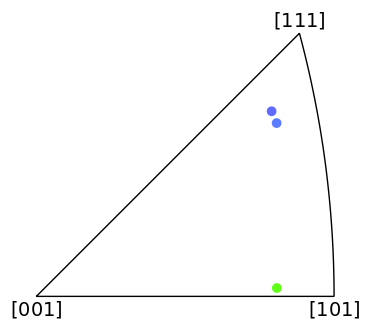

In [ ]:
from orix import plot
from orix.quaternion import Orientation, symmetry
from orix.vector.vector3d import Vector3d
from orix.quaternion.symmetry import get_point_group

solution_vectors_1 = Orientation.from_euler(basic_vectors(output_data[72]), degrees=True, direction='MTEX')


subplot_kw = dict(projection="ipf", symmetry=symmetry.Oh)
fig = plt.figure(figsize=(9, 8))
ipfkey = plot.IPFColorKeyTSL(symmetry.Oh)
rgb_z = ipfkey.orientation2color(solution_vectors_1)

ax0 = fig.add_subplot(221, **subplot_kw)
ax0.scatter(solution_vectors_1, c = rgb_z, alpha=1)

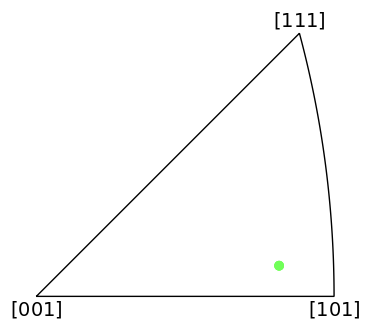

In [ ]:
from orix import plot
from orix.quaternion import Orientation, symmetry
from orix.vector.vector3d import Vector3d
from orix.quaternion.symmetry import get_point_group

solution_vectors_1 = Orientation.from_euler(basic_vectors(output_data[67]), degrees=True)


subplot_kw = dict(projection="ipf", symmetry=symmetry.Oh)
fig = plt.figure(figsize=(9, 8))
ipfkey = plot.IPFColorKeyTSL(symmetry.Oh)
rgb_z = ipfkey.orientation2color(solution_vectors_1)

ax0 = fig.add_subplot(221, **subplot_kw)
ax0.scatter(solution_vectors_1, c = rgb_z, alpha=1)

In [ ]:
import matplotlib.colors as mcolors
colors = mcolors.BASE_COLORS
colors.pop('k')
colors.pop('w')
colors['g'] = (0, 1, 0)
colors['c'] = (0, 1, 1)
colors['m'] = (1, 0, 1)
colors['y'] = (1, 1, 0)

In [ ]:
def distance(x,y):
    dx = x[0]-y[0]
    dy = x[1]-y[1]
    dz = x[2]-y[2]
    return math.sqrt(dx*dx+dy*dy+dz*dz)

def findclosest(pixel):
    solution_vectors_1 = Orientation.from_euler(pixel, degrees=True)
    ipfkey = plot.IPFColorKeyTSL(symmetry.Oh)
    rgb_z = ipfkey.orientation2color(solution_vectors_1)
    mn = 999999
    for key in colors:
        d = distance(rgb_z[0], colors[key])
        if d < mn:
            mn = d
            name_color = key
    return name_color

In [ ]:
i = 0
for output in output_data:
  if findclosest(output) == 'g':
    print(i)
    print(output)
  i = i + 1

15
[40.8, 36.7, 86.8]
67
[184.0, 37.6, 82.8]
69
[29.6, 41.5, 5.17]
72
[35.8, 44.8, 1.7]
